In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [5]:
df['age'].value_counts()

age
?         263
24         47
22         43
21         41
30         40
         ... 
66          1
0.6667      1
76          1
67          1
26.5        1
Name: count, Length: 99, dtype: int64

In [6]:
import numpy as np
for c in ['age', 'fare']:
    df[c] = df[c].replace(('?'), (np.nan)).astype(float)

In [7]:
def bin_age(age):
    if age < 13:
        return 1
    elif age < 19:
        return 2
    else:
        return 3

df['AGEBIN'] = df['age'].apply(bin_age)
df['AGEBIN'].value_counts()

AGEBIN
3    1113
2     102
1      94
Name: count, dtype: int64

In [8]:
df['age'].isnull().sum()

263

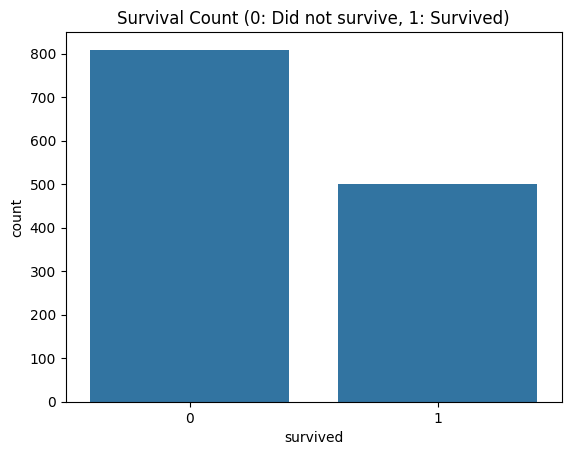

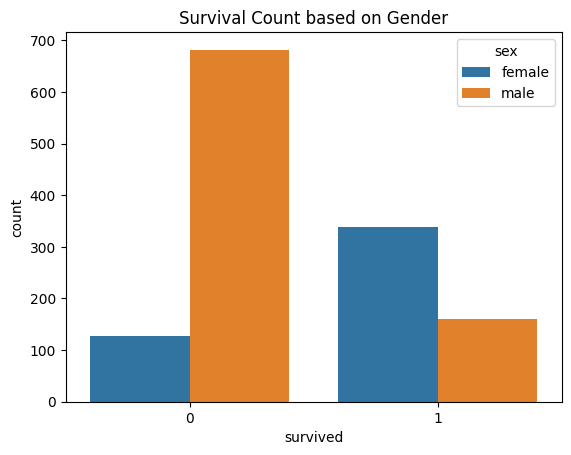

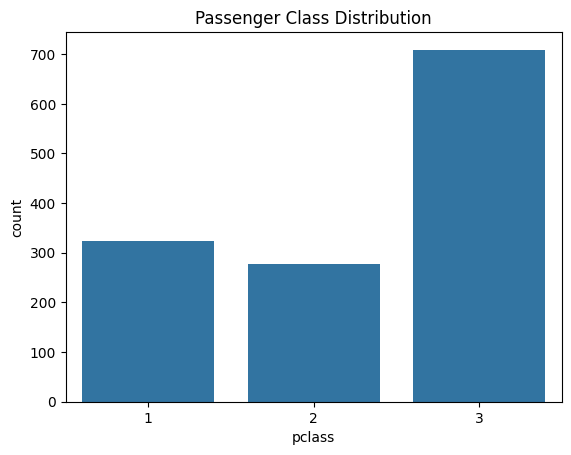

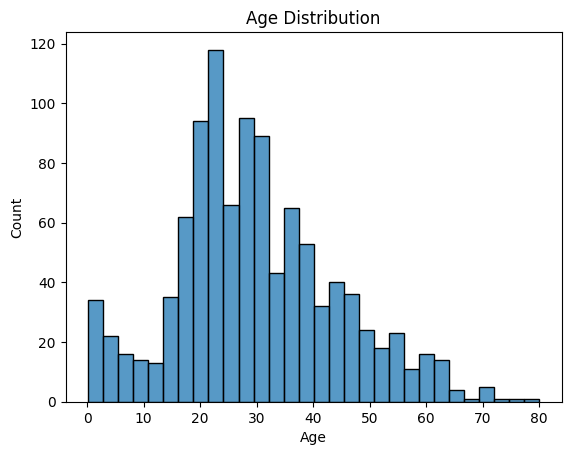

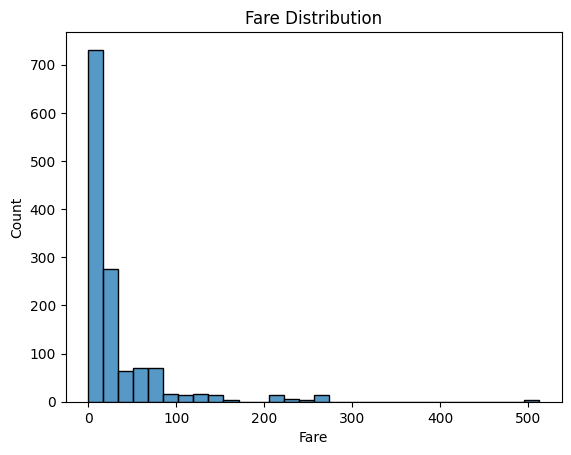

In [9]:
# Display the first few rows of the dataset
df.head()

# Data Exploration and Visualization

# Countplot of Survival
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0: Did not survive, 1: Survived)')
plt.show()

# Countplot of Survival based on Gender
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival Count based on Gender')
plt.show()

# Distribution of Passenger Classes
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Age Distribution
df['age'].dropna(inplace=True)
sns.histplot(df['age'], bins=30, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Fare Distribution
sns.histplot(df['fare'], bins=30, kde=False)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()



In [10]:
# Data Cleaning and Feature Engineering

# Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df.dropna(subset=['embarked'], inplace=True)

# Feature: Family Size
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Feature: Alone (1 if alone, 0 if with family)
df['Alone'] = (df['FamilySize'] == 1).astype(int)

df.head()

df['embarked'].value_counts()

embarked
S    914
C    270
Q    123
?      2
Name: count, dtype: int64

In [11]:
pd.set_option('display.max_columns', None)
pd.crosstab(df['survived'], df['boat'])

boat,1,10,11,12,13,13 15,13 15 B,14,15,15 16,16,2,3,4,5,5 7,5 9,6,7,8,8 10,9,?,A,B,C,C D,D
survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800,4,1,1,0,1
1,5,29,25,18,39,2,1,32,37,1,23,13,26,31,27,2,1,20,23,23,1,25,23,7,8,37,2,19


In [12]:
# Encoding categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['sex', 'embarked', 'cabin', ],) #drop_first=True
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,boat,body,home.dest,AGEBIN,FamilySize,Alone,sex_female,sex_male,embarked_?,embarked_C,embarked_Q,embarked_S,cabin_?,cabin_A10,cabin_A11,cabin_A14,cabin_A16,cabin_A18,cabin_A19,cabin_A20,cabin_A21,cabin_A23,cabin_A24,cabin_A26,cabin_A29,cabin_A31,cabin_A32,cabin_A34,cabin_A36,cabin_A5,cabin_A6,cabin_A7,cabin_A9,cabin_B10,cabin_B101,cabin_B102,cabin_B11,cabin_B18,cabin_B19,cabin_B20,cabin_B22,cabin_B24,cabin_B26,cabin_B28,cabin_B3,cabin_B30,cabin_B35,cabin_B36,cabin_B37,cabin_B38,cabin_B39,cabin_B4,cabin_B41,cabin_B42,cabin_B45,cabin_B49,cabin_B5,cabin_B50,cabin_B51 B53 B55,cabin_B52 B54 B56,cabin_B57 B59 B63 B66,cabin_B58 B60,cabin_B61,cabin_B69,cabin_B71,cabin_B73,cabin_B77,cabin_B78,cabin_B79,cabin_B80,cabin_B82 B84,cabin_B86,cabin_B94,cabin_B96 B98,cabin_C101,cabin_C103,cabin_C104,cabin_C105,cabin_C106,cabin_C110,cabin_C111,cabin_C116,cabin_C118,cabin_C123,cabin_C124,cabin_C125,cabin_C126,cabin_C128,cabin_C130,cabin_C132,cabin_C148,cabin_C2,cabin_C22 C26,cabin_C23 C25 C27,cabin_C28,cabin_C30,cabin_C31,cabin_C32,cabin_C39,cabin_C45,cabin_C46,cabin_C47,cabin_C49,cabin_C50,cabin_C51,cabin_C52,cabin_C53,cabin_C54,cabin_C55 C57,cabin_C6,cabin_C62 C64,cabin_C65,cabin_C68,cabin_C7,cabin_C70,cabin_C78,cabin_C80,cabin_C82,cabin_C83,cabin_C85,cabin_C86,cabin_C87,cabin_C89,cabin_C90,cabin_C91,cabin_C92,cabin_C93,cabin_C95,cabin_C97,cabin_C99,cabin_D,cabin_D10 D12,cabin_D11,cabin_D15,cabin_D17,cabin_D19,cabin_D20,cabin_D21,cabin_D22,cabin_D26,cabin_D28,cabin_D30,cabin_D33,cabin_D34,cabin_D35,cabin_D36,cabin_D37,cabin_D38,cabin_D40,cabin_D43,cabin_D45,cabin_D46,cabin_D47,cabin_D48,cabin_D49,cabin_D50,cabin_D56,cabin_D6,cabin_D7,cabin_D9,cabin_E10,cabin_E101,cabin_E12,cabin_E121,cabin_E17,cabin_E24,cabin_E25,cabin_E31,cabin_E33,cabin_E34,cabin_E36,cabin_E38,cabin_E39 E41,cabin_E40,cabin_E44,cabin_E45,cabin_E46,cabin_E49,cabin_E50,cabin_E52,cabin_E58,cabin_E60,cabin_E63,cabin_E67,cabin_E68,cabin_E77,cabin_E8,cabin_F,cabin_F E46,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,2,?,"St Louis, MO",3,1,1,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,11,?,"Montreal, PQ / Chesterville, ON",1,4,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False

In [13]:
df.drop(['home.dest', 'name', 'boat', 'body', 'ticket', ], axis=1, inplace=True)

In [14]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,AGEBIN,FamilySize,Alone,sex_female,sex_male,embarked_?,embarked_C,embarked_Q,embarked_S,cabin_?,cabin_A10,cabin_A11,cabin_A14,cabin_A16,cabin_A18,cabin_A19,cabin_A20,cabin_A21,cabin_A23,cabin_A24,cabin_A26,cabin_A29,cabin_A31,cabin_A32,cabin_A34,cabin_A36,cabin_A5,cabin_A6,cabin_A7,cabin_A9,cabin_B10,cabin_B101,cabin_B102,cabin_B11,cabin_B18,cabin_B19,cabin_B20,cabin_B22,cabin_B24,cabin_B26,cabin_B28,cabin_B3,cabin_B30,cabin_B35,cabin_B36,cabin_B37,cabin_B38,cabin_B39,cabin_B4,cabin_B41,cabin_B42,cabin_B45,cabin_B49,cabin_B5,cabin_B50,cabin_B51 B53 B55,cabin_B52 B54 B56,cabin_B57 B59 B63 B66,cabin_B58 B60,cabin_B61,cabin_B69,cabin_B71,cabin_B73,cabin_B77,cabin_B78,cabin_B79,cabin_B80,cabin_B82 B84,cabin_B86,cabin_B94,cabin_B96 B98,cabin_C101,cabin_C103,cabin_C104,cabin_C105,cabin_C106,cabin_C110,cabin_C111,cabin_C116,cabin_C118,cabin_C123,cabin_C124,cabin_C125,cabin_C126,cabin_C128,cabin_C130,cabin_C132,cabin_C148,cabin_C2,cabin_C22 C26,cabin_C23 C25 C27,cabin_C28,cabin_C30,cabin_C31,cabin_C32,cabin_C39,cabin_C45,cabin_C46,cabin_C47,cabin_C49,cabin_C50,cabin_C51,cabin_C52,cabin_C53,cabin_C54,cabin_C55 C57,cabin_C6,cabin_C62 C64,cabin_C65,cabin_C68,cabin_C7,cabin_C70,cabin_C78,cabin_C80,cabin_C82,cabin_C83,cabin_C85,cabin_C86,cabin_C87,cabin_C89,cabin_C90,cabin_C91,cabin_C92,cabin_C93,cabin_C95,cabin_C97,cabin_C99,cabin_D,cabin_D10 D12,cabin_D11,cabin_D15,cabin_D17,cabin_D19,cabin_D20,cabin_D21,cabin_D22,cabin_D26,cabin_D28,cabin_D30,cabin_D33,cabin_D34,cabin_D35,cabin_D36,cabin_D37,cabin_D38,cabin_D40,cabin_D43,cabin_D45,cabin_D46,cabin_D47,cabin_D48,cabin_D49,cabin_D50,cabin_D56,cabin_D6,cabin_D7,cabin_D9,cabin_E10,cabin_E101,cabin_E12,cabin_E121,cabin_E17,cabin_E24,cabin_E25,cabin_E31,cabin_E33,cabin_E34,cabin_E36,cabin_E38,cabin_E39 E41,cabin_E40,cabin_E44,cabin_E45,cabin_E46,cabin_E49,cabin_E50,cabin_E52,cabin_E58,cabin_E60,cabin_E63,cabin_E67,cabin_E68,cabin_E77,cabin_E8,cabin_F,cabin_F E46,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
pclass,1.000000,-0.312469,-0.377908,0.060832,0.018322,-0.558683,-0.138693,0.050027,0.147393,-0.124617,0.124617,-0.060480,-0.269658,0.230491,0.096335,0.713857,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.074101,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.060480,-0.042750,-0.060480,-0.060480,-0.042750,-0.042750,-0.060480,-0.042750,-0.042750,-0.060480,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.060480,-0.042750,-0.060480,-0.060480,-0.060480,-0.042750,-0.074101,-0.042750,-0.095738,-0.074101,-0.042750,-0.060480,-0.060480,-0.042750,-0.060480,-0.060480,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.085598,-0.074101,-0.042750,-0.042750,-0.042750,-0.060480,-0.042750,-0.042750,-0.060480,-0.042750,-0.060480,-0.060480,-0.060480,-0.060480,-0.042750,-0.042750,-0.042750,-0.042750,-0.060480,-0.085598,-0.104916,-0.042750,-0.042750,-0.060480,-0.060480,-0.042750,-0.042750,-0.060480,-0.042750,-0.042750,-0.042750,-0.042750,-0.060480,-0.042750,-0.060480,-0.060480,-0.060480,-0.060480,-0.060480,-0.060480,-0.060480,-0.042750,-0.085598,-0.060480,-0.042750,-0.060480,-0.060480,-0.060480,-0.042750,-0.060480,-0.042750,-0.042750,-0.060480,-0.060480,-0.042750,-0.042750,-0.042750,-0.019493,-0.060480,-0.042750,-0.060480,-0.060480,-0.060480,-0.060480,-0.060480,-0.042750,-0.060480,-0.060480,-0.060480,-0.060480,-0.042750,-0.060480,-0.060480,-0.060480,-0.009735,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.042750,-0.009735,-0.042750,-0.042750,-0.042750,0.023279,-0.016875,-0.042750,0.032934,-0.042750,-0.060480,-0.060480,-0.060480,-0.060480,-0.074101,-0.042750,-0.042750,-0.042750,-0.042750,-0.060480,-0.042750,-0.060480,-0.042750,-0.060480,-0.042750,-0.042750,-0.042750,-0.042750,-0.060480,-0.042750,-0.009735,-0.060480,-0.009735,0.023279,0.023279,0.0232

In [15]:
df.corr('kendall')

,pclass,survived,age,sibsp,parch,fare,AGEBIN,FamilySize,Alone,sex_female,sex_male,embarked_?,embarked_C,embarked_Q,embarked_S,cabin_?,cabin_A10,cabin_A11,cabin_A14,cabin_A16,cabin_A18,cabin_A19,cabin_A20,cabin_A21,cabin_A23,cabin_A24,cabin_A26,cabin_A29,cabin_A31,cabin_A32,cabin_A34,cabin_A36,cabin_A5,cabin_A6,cabin_A7,cabin_A9,cabin_B10,cabin_B101,cabin_B102,cabin_B11,cabin_B18,cabin_B19,cabin_B20,cabin_B22,cabin_B24,cabin_B26,cabin_B28,cabin_B3,cabin_B30,cabin_B35,cabin_B36,cabin_B37,cabin_B38,cabin_B39,cabin_B4,cabin_B41,cabin_B42,cabin_B45,cabin_B49,cabin_B5,cabin_B50,cabin_B51 B53 B55,cabin_B52 B54 B56,cabin_B57 B59 B63 B66,cabin_B58 B60,cabin_B61,cabin_B69,cabin_B71,cabin_B73,cabin_B77,cabin_B78,cabin_B79,cabin_B80,cabin_B82 B84,cabin_B86,cabin_B94,cabin_B96 B98,cabin_C101,cabin_C103,cabin_C104,cabin_C105,cabin_C106,cabin_C110,cabin_C111,cabin_C116,cabin_C118,cabin_C123,cabin_C124,cabin_C125,cabin_C126,cabin_C128,cabin_C130,cabin_C132,cabin_C148,cabin_C2,cabin_C22 C26,cabin_C23 C25 C27,cabin_C28,cabin_C30,cabin_C31,cabin_C32,cabin_C39,cabin_C45,cabin_C46,cabin_C47,cabin_C49,cabin_C50,cabin_C51,cabin_C52,cabin_C53,cabin_C54,cabin_C55 C57,cabin_C6,cabin_C62 C64,cabin_C65,cabin_C68,cabin_C7,cabin_C70,cabin_C78,cabin_C80,cabin_C82,cabin_C83,cabin_C85,cabin_C86,cabin_C87,cabin_C89,cabin_C90,cabin_C91,cabin_C92,cabin_C93,cabin_C95,cabin_C97,cabin_C99,cabin_D,cabin_D10 D12,cabin_D11,cabin_D15,cabin_D17,cabin_D19,cabin_D20,cabin_D21,cabin_D22,cabin_D26,cabin_D28,cabin_D30,cabin_D33,cabin_D34,cabin_D35,cabin_D36,cabin_D37,cabin_D38,cabin_D40,cabin_D43,cabin_D45,cabin_D46,cabin_D47,cabin_D48,cabin_D49,cabin_D50,cabin_D56,cabin_D6,cabin_D7,cabin_D9,cabin_E10,cabin_E101,cabin_E12,cabin_E121,cabin_E17,cabin_E24,cabin_E25,cabin_E31,cabin_E33,cabin_E34,cabin_E36,cabin_E38,cabin_E39 E41,cabin_E40,cabin_E44,cabin_E45,cabin_E46,cabin_E49,cabin_E50,cabin_E52,cabin_E58,cabin_E60,cabin_E63,cabin_E67,cabin_E68,cabin_E77,cabin_E8,cabin_F,cabin_F E46,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
pclass,1.000000,-0.294797,-0.275513,-0.061628,-0.026480,-0.591258,-0.124165,-0.078643,0.140278,-0.118514,0.118514,-0.053753,-0.234796,0.226739,0.067416,0.641348,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.065859,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.053753,-0.037995,-0.053753,-0.053753,-0.037995,-0.037995,-0.053753,-0.037995,-0.037995,-0.053753,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.053753,-0.037995,-0.053753,-0.053753,-0.053753,-0.037995,-0.065859,-0.037995,-0.085089,-0.065859,-0.037995,-0.053753,-0.053753,-0.037995,-0.053753,-0.053753,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.076077,-0.065859,-0.037995,-0.037995,-0.037995,-0.053753,-0.037995,-0.037995,-0.053753,-0.037995,-0.053753,-0.053753,-0.053753,-0.053753,-0.037995,-0.037995,-0.037995,-0.037995,-0.053753,-0.076077,-0.093246,-0.037995,-0.037995,-0.053753,-0.053753,-0.037995,-0.037995,-0.053753,-0.037995,-0.037995,-0.037995,-0.037995,-0.053753,-0.037995,-0.053753,-0.053753,-0.053753,-0.053753,-0.053753,-0.053753,-0.053753,-0.037995,-0.076077,-0.053753,-0.037995,-0.053753,-0.053753,-0.053753,-0.037995,-0.053753,-0.037995,-0.037995,-0.053753,-0.053753,-0.037995,-0.037995,-0.037995,-0.029783,-0.053753,-0.037995,-0.053753,-0.053753,-0.053753,-0.053753,-0.053753,-0.037995,-0.053753,-0.053753,-0.053753,-0.053753,-0.037995,-0.053753,-0.053753,-0.053753,-0.014874,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.037995,-0.014874,-0.037995,-0.037995,-0.037995,0.023121,-0.025783,-0.037995,0.032710,-0.037995,-0.053753,-0.053753,-0.053753,-0.053753,-0.065859,-0.037995,-0.037995,-0.037995,-0.037995,-0.053753,-0.037995,-0.053753,-0.037995,-0.053753,-0.037995,-0.037995,-0.037995,-0.037995,-0.053753,-0.037995,-0.014874,-0.053753,-0.014874,0.023121,0.023121,0.0

In [16]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [23]:
# data balancing
balanced_df = df.groupby('survived').sample(n=500, random_state=42)
balanced_df['survived'].value_counts()

survived
0    500
1    500
Name: count, dtype: int64

In [24]:
# using manual balancing
# Train-Test Split
X = balanced_df.drop('survived', axis=1)
y = balanced_df['survived'] 

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Model (Logistic Regression)
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)
y_prob = logreg_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.785

Confusion Matrix:
[[72 24]
 [19 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        96
           1       0.78      0.82      0.80       104

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [21]:
# using SMOTE
    from imblearn.over_sampling import SMOTE
# Drop unnecessary columns


# Train-Test Split
X = df.drop('survived', axis=1)
y = df['survived'] 

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Machine Learning Model (Logistic Regression)
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)
y_prob = logreg_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8240740740740741

Confusion Matrix:
[[137  27]
 [ 30 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       164
           1       0.83      0.81      0.82       160

    accuracy                           0.82       324
   macro avg       0.82      0.82      0.82       324
weighted avg       0.82      0.82      0.82       324



In [51]:
 0       0.76      0.88      0.81       144
           1       0.81      0.66      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [52]:
y_prob[:,1]

array([0.68300444, 0.97117709, 0.9522223 , 0.67505184, 0.45105032,
       0.83210919, 0.79791484, 0.58996355, 0.75973317, 0.02230525,
       0.79721137, 0.15675981, 0.99642917, 0.71047591, 0.5333497 ,
       0.99650485, 0.1777164 , 0.70545719, 0.89450235, 0.64367205,
       0.46764575, 0.14931619, 0.69045334, 0.9988562 , 0.42794097,
       0.92586358, 0.34978118, 0.99734502, 0.86047824, 0.99945165,
       0.18065914, 0.09919274, 0.6068867 , 0.18770409, 0.67009917,
       0.21728841, 0.99423831, 0.84927399, 0.49643146, 0.17811117,
       0.49125805, 0.07398278, 0.77055365, 0.69053819, 0.20505815,
       0.03792302, 0.73128609, 0.16826298, 0.207743  , 0.44503026,
       0.96860488, 0.26493325, 0.78472007, 0.22179192, 0.31532848,
       0.83929854, 0.85301334, 0.37918277, 0.32139218, 0.92988645,
       0.18361712, 0.11683606, 0.76492226, 0.24170751, 0.86588644,
       0.71763713, 0.71679916, 0.99697898, 0.11081117, 0.96780912,
       0.12332855, 0.00390054, 0.07792624, 0.18116843, 0.22265

In [53]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_prob[:,1] >= .75, normalize=True)

ModuleNotFoundError: No module named 'scikitplot'

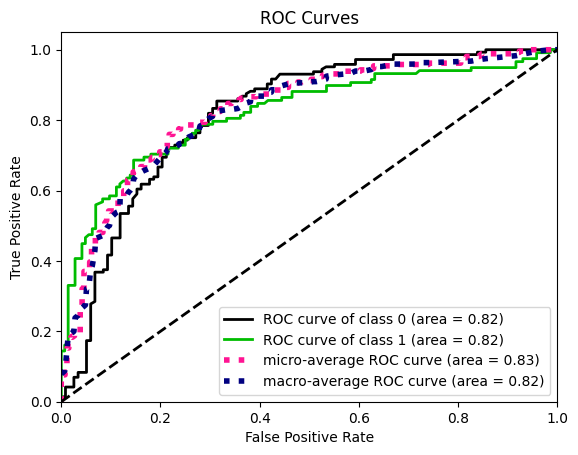

C:\Users\pauls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


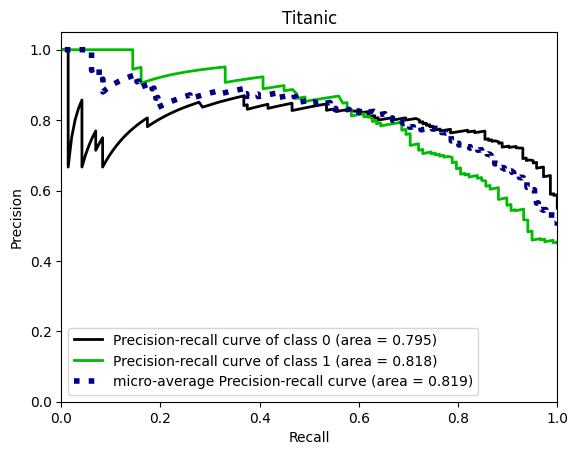

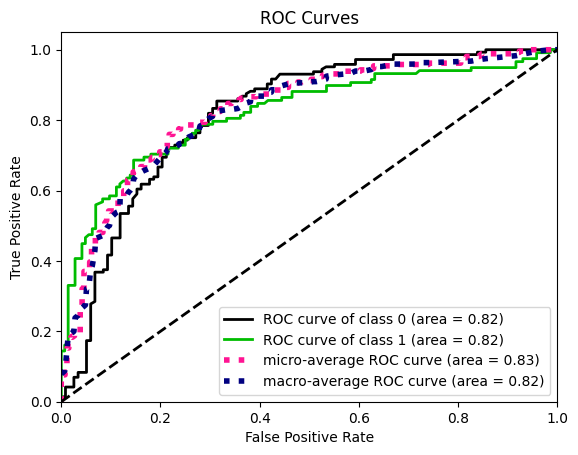

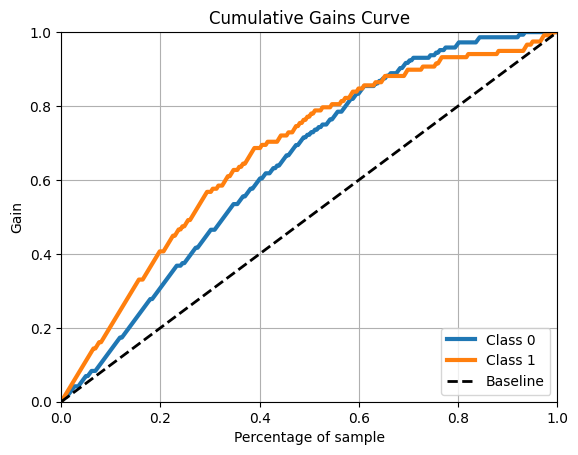

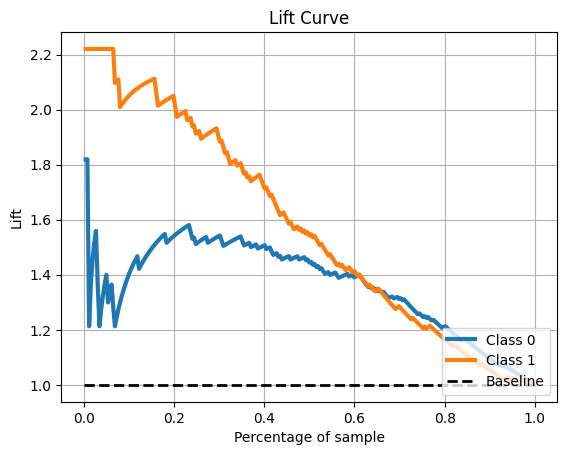

In [12]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()
skplt.metrics.plot_precision_recall_curve(y_test, y_prob,title='Titanic')
plt.show()

skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, y_prob)
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_prob)
plt.show()